In [3]:
import numpy as np
import qcodes as qc

#modified pyqtgraph:
from pyqtgraph4sweep import QtPlot2

In [1]:
# dummy instrument
from qcodes.tests.instrument_mocks import DummyInstrument
dac = DummyInstrument(name="dac", gates=['ch1', 'ch2'])
dmm = DummyInstrument(name="dmm", gates=['idc', 'ig'])
srs = DummyInstrument(name="srs", gates=['X', 'Y'])

import random
dmm.idc.get = lambda: random.gauss(1, 0.1)
dmm.ig.get = lambda: random.gauss(0, 0.01)

srs.X.get = lambda: random.gauss(5,0.1)
srs.Y.get = lambda: random.gauss(1,0.3)

dmm.ig.get()
srs.Y.get()

1.329530575095134

Started at 2019-06-12 15:57:25
DataSet:
   location = 'data/2019-06-12/#042_run1_15-57-18'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (11,)
   Measured | dac_ch1     | ch1          | (11,)
   Measured | dac_ch2     | ch2          | (11,)
   Measured | dmm_ig      | ig           | (11,)
   Measured | dmm_idc     | idc          | (11,)
Finished at 2019-06-12 15:57:38


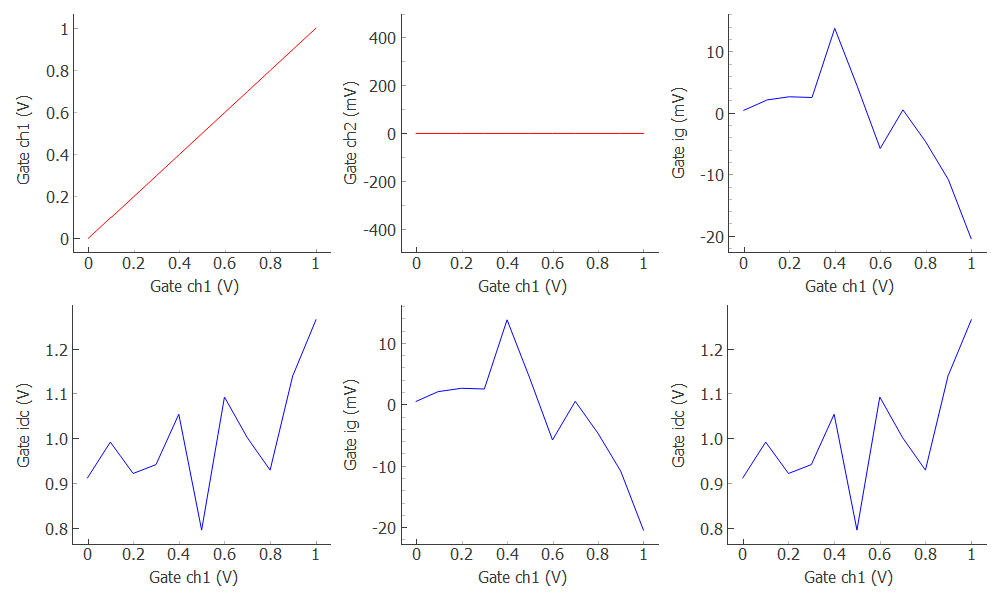

In [6]:
#1D Loop sweep with pyqtgraph and subplot rows
sweep=dac.ch1.sweep(0,1,0.1)
loop = qc.Loop(sweep,delay=1).each(dac.ch1,dac.ch2,dmm.ig,dmm.idc);
data = loop.get_data_set(name='run1');plot = QtPlot2(ncol=3);
plot.add(data.dac_ch1,subplot=1, pen='r');
plot.add(data.dac_ch2,subplot=2, pen='r');
plot.add(data.dmm_ig,subplot=3, pen='b');
plot.add(data.dmm_idc,subplot=4, pen='b');
plot.add(data.dmm_ig,subplot=5, pen='b');
plot.add(data.dmm_idc,subplot=6, pen='b');

try:
    _ = loop.with_bg_task(plot.update).run();
except KeyboardInterrupt:
    pass
plot

Started at 2019-06-12 15:58:09
DataSet:
   location = 'data/2019-06-12/#043_run2_15-58-06'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (21,)
   Setpoint | dac_ch2_set | ch2          | (21, 6)
   Measured | dmm_ig      | ig           | (21, 6)
   Measured | dmm_idc     | idc          | (21, 6)
   Measured | dac_ch1     | ch1          | (21, 6)
   Measured | dac_ch2     | ch2          | (21, 6)
Finished at 2019-06-12 15:58:47


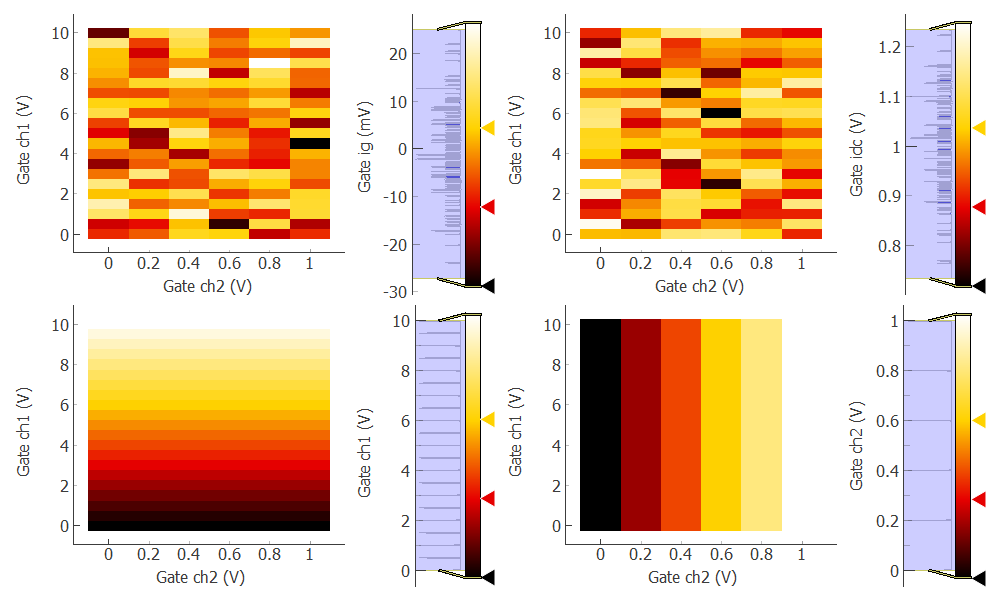

In [7]:
#2D Loop sweep with pyqtgraph and subplot rows
slowsweep=dac.ch1.sweep(0,10,0.5)
fastsweep=dac.ch2.sweep(0,1,0.2)
loop = qc.Loop(slowsweep,1).loop(fastsweep,0.1).each(dmm.ig,dmm.idc,dac.ch1,dac.ch2);

data = loop.get_data_set(name='run2')
plot = QtPlot2(ncol=2)

plot.add(data.dmm_ig,subplot=1)
plot.add(data.dmm_idc,subplot=2)
plot.add(data.dac_ch1,subplot=3)
plot.add(data.dac_ch2,subplot=4)

try:
    _ = loop.with_bg_task(plot.update).run();
except KeyboardInterrupt:
    pass
plot